In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test/character_28_la/96247.png
/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test/character_28_la/44326.png
/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test/character_28_la/96304.png
/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test/character_28_la/2525.png
/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test/character_28_la/96342.png
/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test/character_28_la/14490.png
/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test/character_28_la/26375.png
/kaggle/input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenC

In [5]:
import os
import h5py
import numpy as np
from keras import optimizers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img
import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

In [6]:

trainDataGen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rescale = 1.0/255,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = False,
    fill_mode = 'wrap')

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
"../input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Train",
    target_size = (64,64),
    batch_size = 96,
    color_mode = "grayscale",
    class_mode = "categorical")

Found 43973 images belonging to 26 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    "../input/custom-devanagari-handwritten-character-dataset/DevanagariHandwrittenCharacterDataset/Test",
    target_size=(64,64),
    batch_size=64,
    color_mode = "grayscale",
    class_mode= 'categorical')

Found 8047 images belonging to 26 classes.


In [8]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32,input_shape=(64,64,1),kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(26,activation='softmax'))
 
    
    model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'RMSprop',metrics = ['accuracy']
                )
    return model 
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 256)      

In [12]:
h = model.fit_generator(
      trainGenerator,validation_data=validation_generator,
                              epochs=100,steps_per_epoch = 400,validation_steps = 250,
                              callbacks = [
                              keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='auto'),
                              keras.callbacks.ModelCheckpoint('model_{val_loss:.3f}.h5',
                              save_best_only = True,save_weights_only=False,
                              monitor='val_loss')
                              ]


)


Epoch 1/100
400/400 [==============================] - 58s 145ms/step - loss: 0.2681 - accuracy: 0.9204 - val_loss: 0.1063 - val_accuracy: 0.9681
Epoch 2/100
400/400 [==============================] - 55s 138ms/step - loss: 0.1978 - accuracy: 0.9408 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 3/100
400/400 [==============================] - 56s 141ms/step - loss: 0.1623 - accuracy: 0.9504 - val_loss: 0.0592 - val_accuracy: 0.9826
Epoch 4/100
400/400 [==============================] - 55s 136ms/step - loss: 0.1396 - accuracy: 0.9590 - val_loss: 0.0461 - val_accuracy: 0.9846
Epoch 5/100
400/400 [==============================] - 54s 136ms/step - loss: 0.1226 - accuracy: 0.9641 - val_loss: 0.0533 - val_accuracy: 0.9827
Epoch 6/100
400/400 [==============================] - 54s 135ms/step - loss: 0.1094 - accuracy: 0.9663 - val_loss: 0.0359 - val_accuracy: 0.9894
Epoch 7/100
400/400 [==============================] - 54s 135ms/step - loss: 0.0997 - accuracy: 0.9693 - val_loss: 0.0374 -

In [13]:
model.save('mosaic_round_1_model.h5')

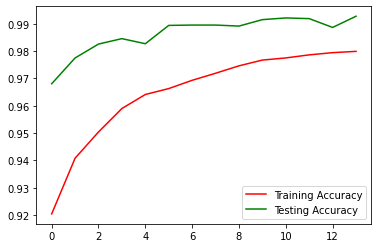

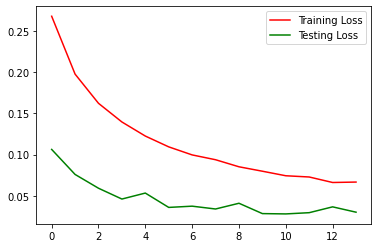

In [15]:

%matplotlib inline
accu=h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()
		


In [ ]:
trainGenerator.class_indices